In [37]:
#Importamos las carpetas que vamos a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [38]:
df0 = pd.read_csv('bahiakino.txt', sep='\s+')

In [39]:
#Conversion de Fecha en variable.
df0['FECHA'] = pd.to_datetime(df0.apply(lambda x: x['FECHA'],1), dayfirst=True)

In [40]:
#Conversion de las columnas "Precip", "Evap", "Tmax", "Tmin", en variables numerias.
columnas = ['PRECIP', 'EVAP', 'TMAX', 'TMIN']
df0[columnas] = df0[columnas].apply(pd.to_numeric, errors= 'coerce', axis=1)

In [41]:
#Tipos de variables.
df0.dtypes

FECHA     datetime64[ns]
PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
dtype: object

In [42]:
# Crear columnas con Año y Mes extraídos de la columna fecha. 
df0['Año'] = df0['FECHA'].dt.year
df0['Mes'] = df0['FECHA'].dt.month

df0.head(), df0.tail()

(       FECHA  PRECIP  EVAP  TMAX  TMIN   Año  Mes
 0 1974-07-01     0.0   7.3  35.0  22.0  1974    7
 1 1974-07-02     0.0  10.5  34.0  22.5  1974    7
 2 1974-07-03     0.0  13.6  31.5  21.0  1974    7
 3 1974-07-04     0.0  10.7  41.0  28.0  1974    7
 4 1974-07-05     0.0  10.9  35.0  28.0  1974    7,
           FECHA  PRECIP  EVAP  TMAX  TMIN   Año  Mes
 6630 2011-07-27     0.0   9.4  34.0  24.0  2011    7
 6631 2011-07-28     0.0   7.0  33.5  24.5  2011    7
 6632 2011-07-29     0.0   7.6  33.0  25.5  2011    7
 6633 2011-07-30     0.0   8.1  36.0  25.5  2011    7
 6634 2011-07-31     0.0   NaN   NaN  27.5  2011    7)

In [43]:
# Número de años distintos df0['Año'].unique(),
# Impresion del numero de años de datos, ya contados con el arreglo NumA.
NumA = len(df0['Año'].unique())
print(NumA, "años de datos")

24 años de datos


In [60]:
#Arreglo para crear tabla de meses y promedio de datos mensuales de las precipitaciones y temperaturas.
init = 1
Meses = [init + i for i in range(0, 12)]

#Arreglo de precipitaciones.
PreipitacionesMens = [df0[df0.Mes==(init + i)].PRECIP.sum()/NumA for i in range (0,12)]

#Arreglo de Temperatura maxima.
TmaxMens = [df0[df0.Mes==(init + i)].TMAX.mean() for i in range (0,12)]

#Arreglo de Temperatura minima.
TminMens = [df0[df0.Mes==(init + i)].TMIN.mean() for i in range (0,12)]

#Dataframe para los promedios mensuales.
dat_mens= {'Mes': Meses, 'Precip.Prom': PreipitacionesMens, 'Tmax.Prom': TmaxMens, 'Tmin.Prom': TminMens}
df0_mensual = pd.DataFrame(data=dat_mens)
df0_mensual

#En la tabla que se genera, vamos a descartar la primera columna de datos ya que son el contador de Python.

,Mes,Precip.Prom,Tmax.Prom,Tmin.Prom
0,1,7.508333,19.702471,6.594286
1,2,5.166667,21.462598,7.166864
2,3,1.750000,22.931542,8.585492
3,4,0.666667,25.518492,10.700719
4,5,0.291667,28.093137,13.230392
5,6,1.208333,31.985887,18.229839
6,7,13.345833,33.007785,23.729706
7,8,27.808333,33.827075,23.788538
8,9,16.179167,33.129529,21.980000
9,10,7.983333,29.516608,15.895288


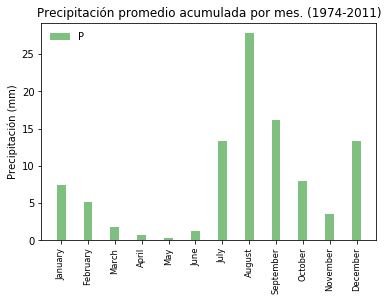

In [72]:
#Gráfica de barras de la precipitacion promedio acumulada por mes.
Mns = calendar.month_name[1:13] 

#Calculo del ancho óptimo.
width = np.min(np.diff(Meses))/3

#Graficando 
plt.bar(Meses-width, PreipitacionesMens, width, align='center', alpha=0.5, color= "G")
plt.xticks(Meses-width, Mns, size = 'small', color = 'K', rotation = 90)
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio acumulada por mes. (1974-2011)')
plt.legend(('PMENSUAL'),frameon=False,loc='upper left')
plt.savefig('precipromensual',plt=2000)
plt.show()

In [47]:
#Arreglo para crear tabla de meses y promedio de datos mensuales de las precipitaciones y temperaturas.

Años = [i + 1 for i in range(1973, 2011)]

#Arreglo de precipitaciones.
PreipitacionesAño = [df0[df0.Año==(init + i)].PRECIP.sum()/NumA for i in range (1973,2011)]

#Arreglo de Temperatura maxima.
TmaxAño = [df0[df0.Año==(init + i)].TMAX.mean() for i in range (1973,2011)]

#Arreglo de Temperatura minima.
TminAño = [df0[df0.Año==(init + i)].TMIN.mean() for i in range (1973,2011)]

#Dataframe para los promedios mensuales.
dat_año= {'Año': Años, 'Precip.Prom': PreipitacionesAño, 'Tmax.Prom': TmaxAño, 'Tmin.Prom': TminAño}
df0_anual = pd.DataFrame(data=dat_año)
df0_anual

#En la tabla que se genera, vamos a descartar la primera columna de datos ya que son el contador de Python.

,Año,Precip.Prom,Tmax.Prom,Tmin.Prom
0,1974,3.741667,29.763587,17.084239
1,1975,2.329167,27.878356,11.665753
2,1976,4.454167,29.464208,11.624590
3,1977,4.362500,27.165753,14.726301
4,1978,2.250000,27.763158,13.870044
5,1979,1.791667,26.723214,13.031250
6,1980,2.895833,27.898907,15.159836
7,1981,3.791667,26.642466,14.782192
8,1982,6.395833,26.102210,14.317680
9,1983,8.925000,26.495509,13.706587


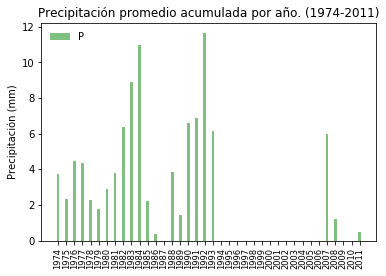

In [82]:
#Gráfica de barras de la precipitacion promedio acumulada por mes.
Añs = Años
#Calculo del ancho óptimo.
width = np.min(np.diff(Añs))/3

#Graficando 
plt.bar(Años-width, PreipitacionesAño, width, align='center', alpha=0.5, color= "G")
plt.xticks(Años-width, Añs, size = 'small', color = 'K', rotation = 90)
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio acumulada por año. (1974-2011)')
plt.legend(('PANUAL'),frameon=False,loc='upper left')
plt.savefig('PreciAño',plt=2000)
plt.show()

In [19]:
# Años húmedos y años secos
# Años incompletos 1981, 1998 - se excluyen
for i in range(1982,1997):
    PrecipAnual = df0['PRECIP'][df0['Año']==[i+1]].sum()
    print("Año", i+1,":", PrecipAnual, "mm")

Año 1983 : 214.2 mm
Año 1984 : 263.9 mm
Año 1985 : 53.0 mm
Año 1986 : 9.0 mm
Año 1987 : 0.0 mm
Año 1988 : 92.0 mm
Año 1989 : 34.0 mm
Año 1990 : 159.0 mm
Año 1991 : 165.0 mm
Año 1992 : 279.0 mm
Año 1993 : 148.0 mm
Año 1994 : 0.0 mm
Año 1995 : 0.0 mm
Año 1996 : 0.0 mm
Año 1997 : 0.0 mm


In [20]:
# Número de datos faltantes por año
for i in range(1982,1997):
    NumDatos= df0['PRECIP'][df0['Año']==[i+1]].count()
    print("Año:", i+1, "Num Datos", NumDatos, ", ", np.round(NumDatos/365.0, decimals=2), "%")

Año: 1983 Num Datos 334 ,  0.92 %
Año: 1984 Num Datos 366 ,  1.0 %
Año: 1985 Num Datos 365 ,  1.0 %
Año: 1986 Num Datos 207 ,  0.57 %
Año: 1987 Num Datos 0 ,  0.0 %
Año: 1988 Num Datos 244 ,  0.67 %
Año: 1989 Num Datos 233 ,  0.64 %
Año: 1990 Num Datos 273 ,  0.75 %
Año: 1991 Num Datos 365 ,  1.0 %
Año: 1992 Num Datos 306 ,  0.84 %
Año: 1993 Num Datos 355 ,  0.97 %
Año: 1994 Num Datos 0 ,  0.0 %
Año: 1995 Num Datos 0 ,  0.0 %
Año: 1996 Num Datos 0 ,  0.0 %
Año: 1997 Num Datos 0 ,  0.0 %


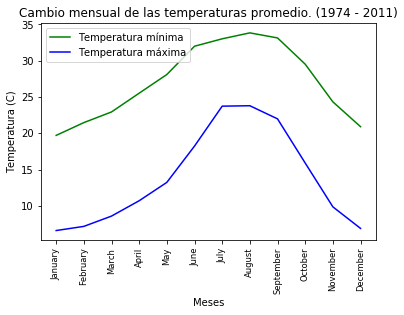

In [96]:
#Gráfica que demuestre la temperatura máxima y mínima promedio a través del tiempo.
X = Mns
Mns = calendar.month_name[1:13]

#Longitud del arreglo de datos
N = np.arange(len(X)) 

#Lista de las temperaturas promedio por mes.
Y1 = TmaxMens
Y2 = TminMens

plt.plot(Y1, label="Temperatura mínima", color = 'G')
plt.xlabel("Meses")
plt.ylabel("Temperatura (C)")


plt.xticks(N, X, size = 'small',color = 'k',rotation = 90)

plt.plot(Y2, label="Temperatura máxima", color = 'B')
plt.legend()
plt.title('Cambio mensual de las temperaturas promedio. (1974 - 2011)')
plt.savefig('tempmensual',plt=2000)
plt.show()

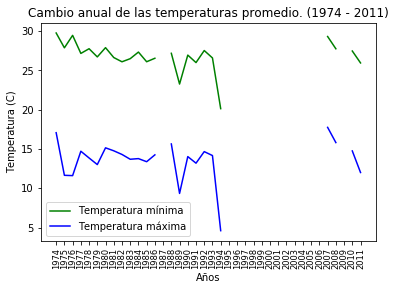

In [101]:
#Gráfica que demuestre la temperatura máxima y mínima promedio a través del tiempo.
X = Años

#Longitud del arreglo de datos
N = np.arange(len(X)) 

#Lista de las temperaturas promedio por mes.
Y1 = TmaxAño
Y2 = TminAño

plt.plot(Y1, label="Temperatura mínima", color = 'G')
plt.xlabel("Años")
plt.ylabel("Temperatura (C)")


plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)

plt.plot(Y2, label="Temperatura máxima", color = 'B')
plt.legend()
plt.title('Cambio anual de las temperaturas promedio. (1974 - 2011)')
plt.savefig('tempanual',plt=2000)
plt.show()

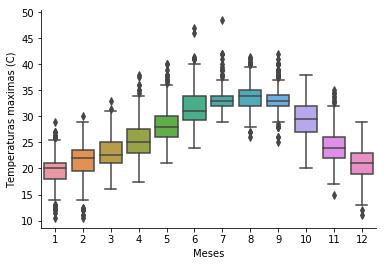

In [104]:
##Realizamos el diagrama de cajas para las temperaturas máximas de cada mes con seaborn.
ax = sns.boxplot(x="Mes", y="TMAX", data=df0)
ax.set(xlabel='Meses', ylabel='Temperaturas maximas (C)')

#Remueve la "espina dorsal" de los ejes
sns.despine() 

#Guardamos la figura
plt.savefig('cajatmaxmensualsns',plt=2000) 
plt.show()

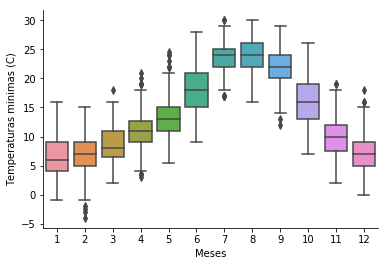

In [95]:
#Realizamos el diagrama de cajas para las temperaturas máximas de cada mes con seaborn.
ax = sns.boxplot(x="Mes", y="TMIN", data=df0)
ax.set(xlabel='Meses', ylabel='Temperaturas minimas (C)')

#Remueve la "espina dorsal" de los ejes
sns.despine() 

#Guardamos la figura
plt.savefig('cajatmaxmensualsns',plt=2000) 
plt.show()

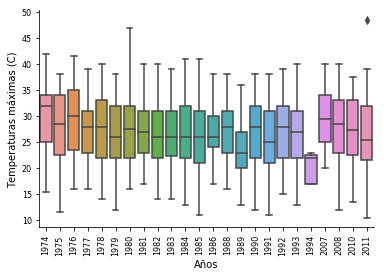

In [106]:
#Realizamos el diagrama de cajas para las temperaturas máximas de cada año
ax = sns.boxplot(x="Año", y="TMAX", data=df0)
ax.set(xlabel='Años', ylabel='Temperaturas máximas. (C)')

#Rotamos los datos 90 grados para mejor visualización
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#Tamaño de fuente de datos en los ejes
ax.tick_params(labelsize=8)

#Remueve la "espina dorsal" de los ejes
sns.despine()
plt.savefig('cajatmaxanual',plt=2000)

#Guardamos la imagen generada de la grafica en la computadora.
plt.show()

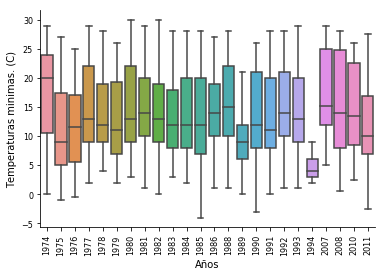

In [111]:
#Realizamos el diagrama de cajas para las temperaturas máximas de cada año
ax = sns.boxplot(x="Año", y="TMIN", data=df0)
ax.set(xlabel='Años', ylabel='Temperaturas minimas. (C)')

#Rotamos los datos 90 grados para mejor visualización
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#Tamaño de fuente de datos en los ejes
ax.tick_params(labelsize=8)

#Remueve la "espina dorsal" de los ejes
sns.despine()
plt.savefig('cajatminanual',plt=2000)

#Guardamos la imagen generada de la grafica en la computadora.
plt.show()